In [1]:
import tensorflow as tf
# tf.debugging.set_log_device_placement(True)

## tensorflow

- **numpy와 pandas 등은 tensorflow, pytorch와 호환**
    - dir(tf) __array__ 있음 -> 호환
    - 그렇지만 되는 package와 안되는 package가 있음.
    - numpy -> tensor로 하는데 overhead 생김 -> 데이터를 tensor로 저장해 numpy변환
    
### 연습용 데이터 사용
- keras
- tensorflow dataset (https://www.tensorflow.org/datasets)
- aihub 등 사이트

In [45]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()  # mnist는 modulle

# len으로 unpacking 개수 보기

## holdout
- train, test set 나누는 것, test는 쓰지 않는다.
- **일반화된 성능 확보, 보장**

    - two, three way : validation차이

- 잘랐을 때 **서로 독립이라고 가정해야 하고 분포도 일정해야 함(iid)**
    - 시계열 데이터를 제외하고 독립이어야(시계열은 시간에 따라)
- shuffle(random하게)

</br>

- three way -> 보통 parameter tuning을 위해 사용
- keras는 fit에서 three way를 자체적으로 제공

- **hyperparameter를 찾으면 holdout하지 않은 모든 데이터로 재학습함.**
     - 최소 좋아지거나 같아짐

### <span style="color:blue">test의 비율을 어떻게?</span>
- 분리하는 비율에 따라 성능이 다름
- test가 많으면 비관적 편향 -> train이 줄어들기 때문 -> **성능이 기존 데이터에 비해 떨어짐**
- test가 작으면 모델 성능의 분산이 커짐.  -> 분산 편향 trade - off
- 보통 **1/4~1/3**

</br>

### stratify 
- 층화계층법 -> y값 관점에서 분포를 맞춰줌.
- 데이터가 어느 정도 크면 맞춰짐(큰 수의 법칙)

</br>

**data leakage**
- test가 train에 섞임 (train과 test에 같은 데이터)

**data shift**
- train과 test가 완전 다름

</br>

- sub sampling으로 만든 모델 -> 절대적 수치를 정하기 힘듬
- train, test를 여러 번 사용 -> cross validation, 몬테 카를로

### 재치환 평가
- train로 모델 평가 -> **학습이 되고 있는지 확인하기 위함**
- train으로 재치환 평가, validation으로 평가

- 그래프 : **learning curve**
     - 데이터의 크기별로 보기(데이터가 충분한지)
     - 에폭별로 보기
- 낙관적 편향

**cross- validation**
- 데이터가 작아서
- deep-learning에서는 잘 안씀 -> 시간 문제 때문에

</br>

## learning curve

- no data : 분산이 큼
![best.PNG](nodata.PNG)
- underfitting
![under.PNG](underfitting.PNG)
![under1.PNG](underfitting1.PNG)
- overfitting
![over.PNG](overfitting.PNG)
- leak test
![leak.PNG](leak_test.PNG)
- best
![best.PNG](best.PNG)

In [4]:
import numpy as np
np.unique(y_train, return_counts=True) # 어느 정도 분포가 맞음.

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([5923, 6742, 5958, 6131, 5842, 5421, 5918, 6265, 5851, 5949],
       dtype=int64))

In [5]:
np.unique(y_test, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([ 980, 1135, 1032, 1010,  982,  892,  958, 1028,  974, 1009],
       dtype=int64))

In [6]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 2s 2ms/step - loss: 3.2895 - accuracy: 0.7370 - val_loss: 0.6198 - val_accuracy: 0.8712
Epoch 2/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.6478 - accuracy: 0.8339 - val_loss: 0.4349 - val_accuracy: 0.8933
Epoch 3/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.5133 - accuracy: 0.8624 - val_loss: 0.3720 - val_accuracy: 0.9103
Epoch 4/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4594 - accuracy: 0.8741 - val_loss: 0.3647 - val_accuracy: 0.9223
Epoch 5/5
1313/1313 [==============================] - 2s 2ms/step - loss: 0.4312 - accuracy: 0.8851 - val_loss: 0.3205 - val_accuracy: 0.9238


<AxesSubplot:>

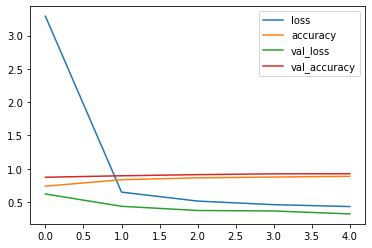

In [11]:
import pandas as pd
pd.DataFrame(history.history).plot.line()

## MinMaxScaler
- 성능을 높이기 위함.
- 1이하로 값을 만들면 NN구조상 성능이 좋아짐.
- 0과 1사이 -> 0에 가까운 값일수록 빠른 학습.


- tensorflow 학습하는 5가지 방법

</br>

- estimator : 미리 만들어 놓은 것 < keras
- keras : 고수준이고 확장가능성 -> 저수준인 tensor로 모든 것을 할 필요x
    - 객체지향적으로 만듬.()
        - Sequential (OOP / Declarative) : 재사용성, 선언 방식(모양을 맞추면 그에 맞게 실행)
            - layer들을 하나의 가상의 container로 생각(가상의 sequential)
        - Model(OOP+FP) : 
        
- feedforward : 앞으로 가서 값을 전달

In [12]:
model = tf.keras.models.Sequential()
# dir(model)

# 레이어 추가, 구축, compute, fit 등 여러 layer들을 한꺼번에 관리

In [15]:
layer1 = tf.keras.layers.Dense(64)
model.add(layer1)
model.layers

In [16]:
model.pop()
model.layers

# 

[]

pop -> **tranfer learning** : 뒤에서부터 layer를 빼야함. 

In [17]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64)
])

In [23]:
model = tf.keras.models.Sequential()
layer1 = tf.keras.layers.Dense(64,input_shape=(28*28,),name='layer1') # fully connected layer
layer2 = tf.keras.layers.Dense(10, name='layer2')
# 1차원 데이터 받기

# layer1 = tf.keras.layers.Dense(64,input_dim=28*28,name='layer1') # input dim
# shape은 list로도 되지만 관례상 tuple임

In [24]:
model.add(layer1)
model.add(layer2)

In [25]:
model.summary()

# 선언을 통해 computation graph

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
layer2 (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [21]:
tf.keras.backend.clear_session()  # summary에 상태 추가 x

In [ ]:
x_train = x_train.reshape(-1,28*28)

# flatten은 모든 데이터를 1차로 바꿈

In [ ]:
# 모델 자체에서 바꾸기
flatten = tf.keras.layers.Flatten(input_shape=(28*28,))

In [ ]:
layer1 = tf.keras.layers.Dense(64,input_shape=(28* 28,),activation='relu')
layer2 = tf.keras.layers.Dense(10, name='layer2')
activa = tf.keras.layers.Activation('softmax')

# activation 적용 두 가지

In [33]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28*28,)),
    tf.keras.layers.Dense(64,name='layer1',activation='relu'),
    tf.keras.layers.Dense(10, name='layer2', activation='softmax')
])

In [37]:
tf.keras.utils.plot_model(model)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
layer1 (Dense)               (None, 64)                50240     
_________________________________________________________________
layer2 (Dense)               (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [38]:
tf.nn.relu # duck typing

<function tensorflow.python.ops.gen_nn_ops.relu(features, name=None)>

In [39]:
tf.keras.activations.softmax

<function tensorflow.python.keras.activations.softmax(x, axis=-1)>

In [41]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['acc']) 
# categorical_crossentropy : one-hot-encoding 되어 있는 경우

# adam : learaning rate와 gradient descent를 동시에 바꿈

In [46]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 916us/step - loss: 10.9935 - acc: 0.9606
Epoch 2/5
1875/1875 [==============================] - 2s 842us/step - loss: 5.3594 - acc: 0.9680
Epoch 3/5
1875/1875 [==============================] - 2s 849us/step - loss: 3.6428 - acc: 0.9689
Epoch 4/5
1875/1875 [==============================] - 2s 883us/step - loss: 2.6431 - acc: 0.9700
Epoch 5/5
1875/1875 [==============================] - 2s 898us/step - loss: 2.0212 - acc: 0.9712


In [47]:
x_train = x_train/ 255

In [48]:
model.fit(x_train, y_train, epochs=5)
# loss 범위가 다르다.

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1793 - acc: 0.9649
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1041 - acc: 0.9728
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0880 - acc: 0.9767
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0751 - acc: 0.9799
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0637 - acc: 0.9821


학습 멈추는 것 관련

- tf.keras.callbacks.EarlyStopping
- tf.keras.callbacks.ReduceLROnPlateau

</br>
- out : reutrn값이 있다.

In [49]:
history = model.fit(x_train, y_train, epochs=5) # 중간 결과를 loss+metric기반으로 보관

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0549 - acc: 0.9839
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0476 - acc: 0.9861
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0411 - acc: 0.9878
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0354 - acc: 0.9894
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0301 - acc: 0.9910


In [50]:
history.history

{'loss': [0.05489680916070938,
  0.0475829616189003,
  0.041138987988233566,
  0.03537708893418312,
  0.030117301270365715],
 'acc': [0.9838833212852478,
  0.9860666394233704,
  0.9877833127975464,
  0.9893666505813599,
  0.9910333156585693]}

<AxesSubplot:>

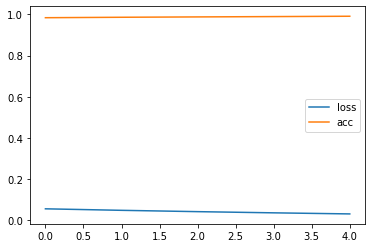

In [51]:
pd.DataFrame(history.history).plot.line()

evaluate : overfitting 났는지 확인

In [52]:
x_test = x_test/255

In [53]:
model.evaluate(x_test,y_test)

W0922 21:52:40.299979 27872 network.py:957] Model was constructed with shape (None, 784) for input Tensor("flatten_2_input:0", shape=(None, 784), dtype=float32), but it was called on an input with incompatible shape (None, 28, 28).


313/313 [==============================] - 0s 685us/step - loss: 0.0841 - acc: 0.9775


[0.08407135307788849, 0.9775000214576721]

In [54]:
history.epoch

[0, 1, 2, 3, 4]

https://www.tensorflow.org/tutorials/keras/regression

데이터 나누기
1. pop
2. onehot
3. sample -> train_test

In [56]:
import seaborn as sns
mpg = sns.load_dataset('mpg')

In [58]:
# 1.
origin = mpg.pop('origin')
mpg.head() # x,y값 분리

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino


In [61]:
# 2.
mpg['USA'] = (origin == 1)*1.0
mpg['Europe'] = (origin == 2)*1.0
mpg['Japan'] = (origin == 3)*1.0
mpg.tail()  

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,name,USA,Europe,Japan
393,27.0,4,140.0,86.0,2790,15.6,82,ford mustang gl,0.0,0.0,0.0
394,44.0,4,97.0,52.0,2130,24.6,82,vw pickup,0.0,0.0,0.0
395,32.0,4,135.0,84.0,2295,11.6,82,dodge rampage,0.0,0.0,0.0
396,28.0,4,120.0,79.0,2625,18.6,82,ford ranger,0.0,0.0,0.0
397,31.0,4,119.0,82.0,2720,19.4,82,chevy s-10,0.0,0.0,0.0


In [62]:
#3.
train_dataset = mpg.sample(frac=0.8,random_state=0)
test_dataset = mpg.drop(train_dataset.index)

In [63]:
from sklearn.model_selection import train_test_split
iris = sns.load_dataset('iris')
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1],iris.species)

In [66]:
y_train.value_counts() # 분포 다르게 나옴.

virginica     41
setosa        39
versicolor    32
Name: species, dtype: int64

In [67]:
x_train, x_test, y_train, y_test = train_test_split(iris.iloc[:,:-1],iris.species,
                                                   stratify=iris.species)
y_train.value_counts()

setosa        38
virginica     37
versicolor    37
Name: species, dtype: int64

In [71]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
data = x_train.reshape(-1,28*28)
x_train, x_test, y_train, y_test = train_test_split(data,y_train,
                                                   stratify=y_train)
x_train = x_train.reshape(-1,28,28)
np.unique(y_train, return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([4442, 5056, 4469, 4598, 4382, 4066, 4438, 4699, 4388, 4462],
       dtype=int64))

In [72]:
x_train[[0,1,2]]  # fancy indexing

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [73]:
np.where(y_train==1)

(array([    1,    11,    22, ..., 44946, 44947, 44963], dtype=int64),)

- coeration
    - tensorflow의 기본 type : flaot32
    - 관례상 /255.0 안해도 됨
    
pip install -q : 옛날버전 설치니깐 주의...

#### fashion mnist : 패션 아이템 10가지

In [74]:
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


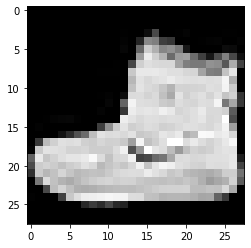

In [77]:
import matplotlib.pyplot as plt
plt.imshow(x_train[0],cmap='gray')

holdout하기 전 
</br>

### EDA

In [78]:
# 
np.unique(y_train,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8),
 array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
       dtype=int64))

In [80]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
x,y = np.unique(y_train,return_counts=True)

In [82]:
dat = pd.DataFrame(y.reshape(1,-1),columns=class_names)
dat

,T-shirt/top,Trouser,Pullover,Dress,Coat,Sandal,Shirt,Sneaker,Bag,Ankle boot
0,6000,6000,6000,6000,6000,6000,6000,6000,6000,6000


<AxesSubplot:>

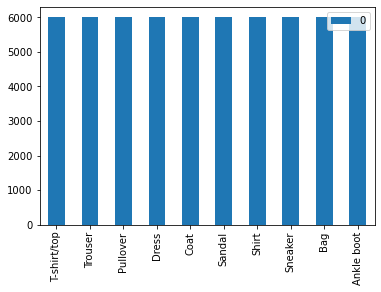

In [83]:
dat.T.plot.bar()